# **Importing Libraries**

In [85]:
# !pip install seaborn

In [86]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

## Reading Data

This data set is comprised of **four sub data sets**: **KDDTest+**, **KDDTest-21**,** KDDTrain+**, **KDDTrain+_20Percent**, although **KDDTest-21** and **KDDTrain+_20Percent are subsets of the KDDTrain+ and KDDTest+**. From now on, **KDDTrain+ will be referred to as train** and **KDDTest+ will be referred to as test**. The **KDDTest-21 is a subset of test, without the most difficult traffic records (Score of 21)**, and the **KDDTrain+_20Percent is a subset of train**, whose record count makes up** 20% of the entire train dataset**. That being said, the traffic records that exist in the KDDTest-21 and KDDTrain+_20Percent are already in test and train respectively and aren’t new records held out of either dataset.

These data sets contain the **records of the internet traffic** seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains **43 features** per record, with **41 of the features referring to the traffic input** itself and the **last two are labels** (whether it is a normal or attack) and **Score** (the severity of the traffic input itself).

In [87]:
train = 'dataset/KDD_DATA.txt'


In [88]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}

In [89]:

file_path = "/content/KDD_DATA.txt"  # Update based on actual path

train_data = pd.read_csv(file_path, names=feature, header=None)  # Adjust separator if needed

train_data.head()  # Show first few rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [90]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,neptune,20
148513,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal,21
148514,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,normal,18
148515,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,neptune,20


In [91]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(148517, 42)

## Data Type Checking and Statistical Reports

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [93]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [94]:
# number of attack labels
train_data['label'].value_counts()

,count
label,
normal,77054
neptune,45871
satan,4368
ipsweep,3740
smurf,3311
portsweep,3088
nmap,1566
back,1315
guess_passwd,1284


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

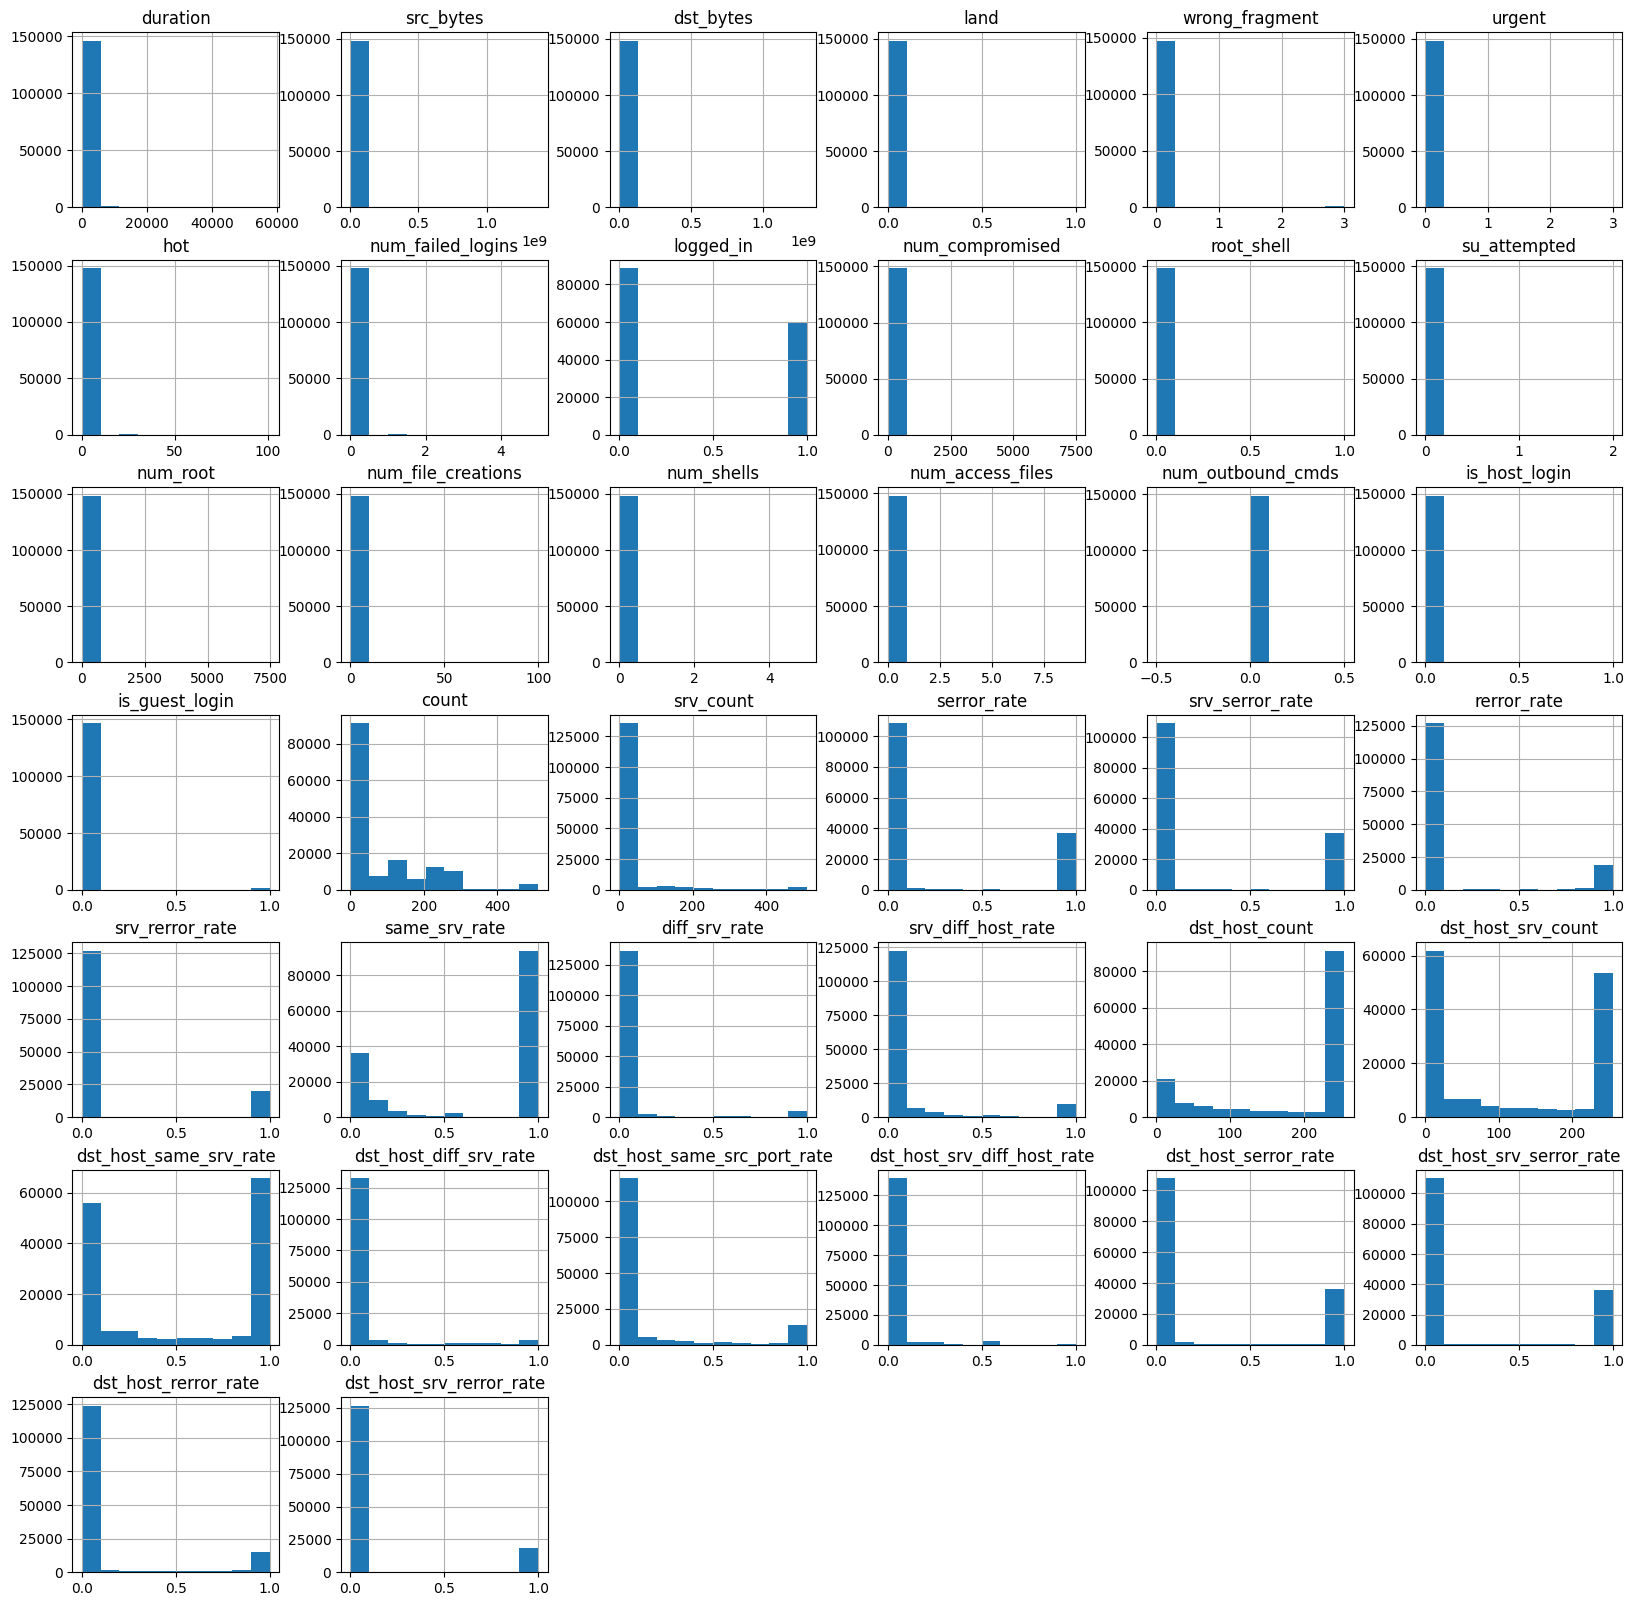

In [95]:
plt.rcParams['figure.figsize'] = (20, 20)

train_data.hist()

# **Data Analysis**


*   Data Visualization
*   Data Mining



## **Univariate Analysis**

In [96]:
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")

### Label

In [97]:
# number of attack labels
train_data['label'].value_counts()

,count
label,
normal,77054
neptune,45871
satan,4368
ipsweep,3740
smurf,3311
portsweep,3088
nmap,1566
back,1315
guess_passwd,1284


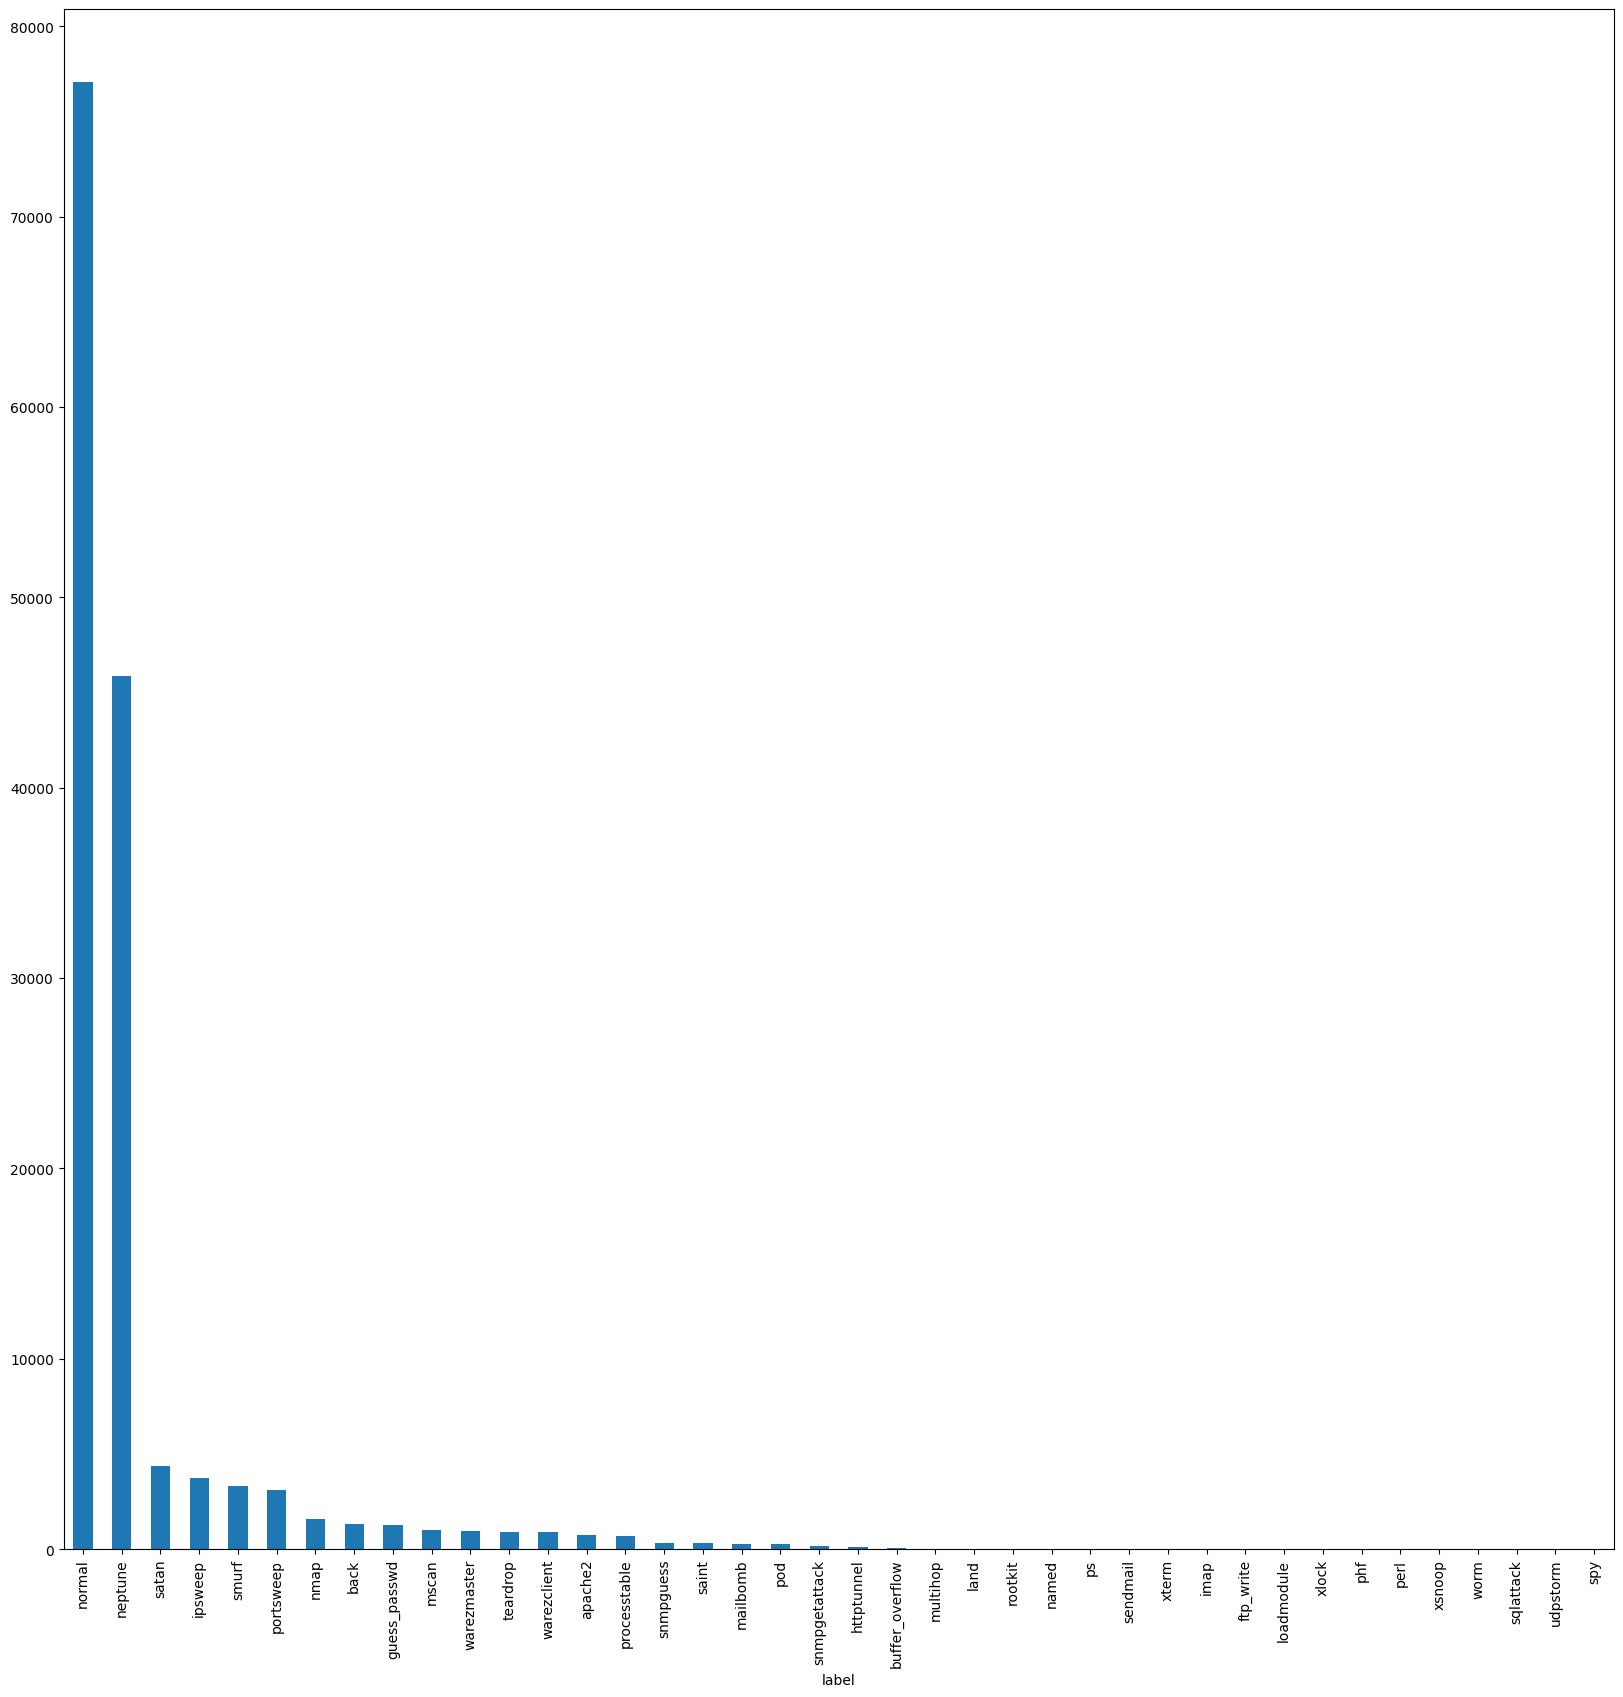

In [98]:
bar_graph('label')

Within the data set exists **4 different classes of attacks**:

*   **Denial of Service (DoS)**
*   **Probe**
*   **User to Root(U2R)**
*   **Remote to Local (R2L)**











**DoS** is an attack that **tries to shut down traffic flow** to and from the target system. **The IDS is flooded with an abnormal amount of traffic**, which the **system can’t handle**, and **shuts down to protect itself**. This prevents normal traffic from visiting a network. An example of this could be an online retailer getting flooded with online orders on a day with a big sale, and because the network can’t handle all the requests, it will shut down preventing paying customers to purchase anything. **This is the most common attack in the data set**.

**Probe** or surveillance is an attack that **tries to get information from a network**. The goal here is to act like a thief and **steal important information**, whether it be personal information about clients or banking information.

**U2R** is an attack that **starts off with a normal user account** and **tries to gain access to the system or network, as a super-user (root)**. The attacker attempts to exploit the vulnerabilities in a system to **gain root privileges/access**.

**R2L** is an attack that tries to **gain local access to a remote machine**. **An attacker does not have local access to the system/network**, and tries to “hack” their way into the network.

It is noticed from the descriptions above that **DoS acts differently from the other three attacks**, where **DoS attempts to shut down a system to stop traffic flow altogether**, whereas the **other three attempts to quietly infiltrate the system undetected**.

In the table below, a breakdown of the **different subclasses of each attack** that exists in the data set is shown:

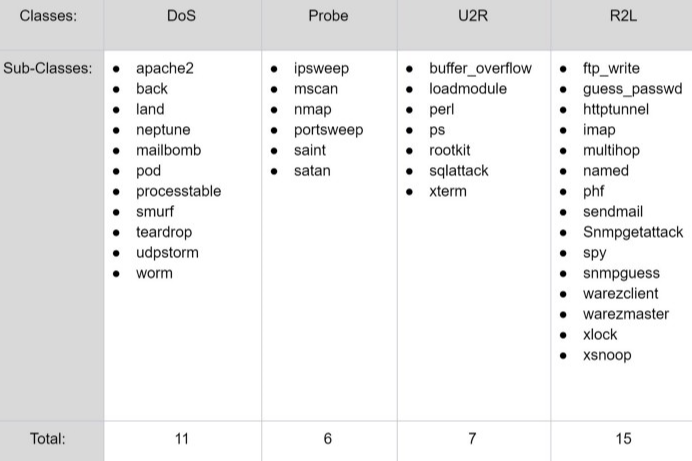

In [99]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)



In [100]:
change_label(train_data)

<ipython-input-99-60938f0df650>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


In [101]:
# distribution of attack classes
train_data.label.value_counts()

,count
label,
normal,77054
Dos,53387
Probe,14077
R2L,3880
U2R,119


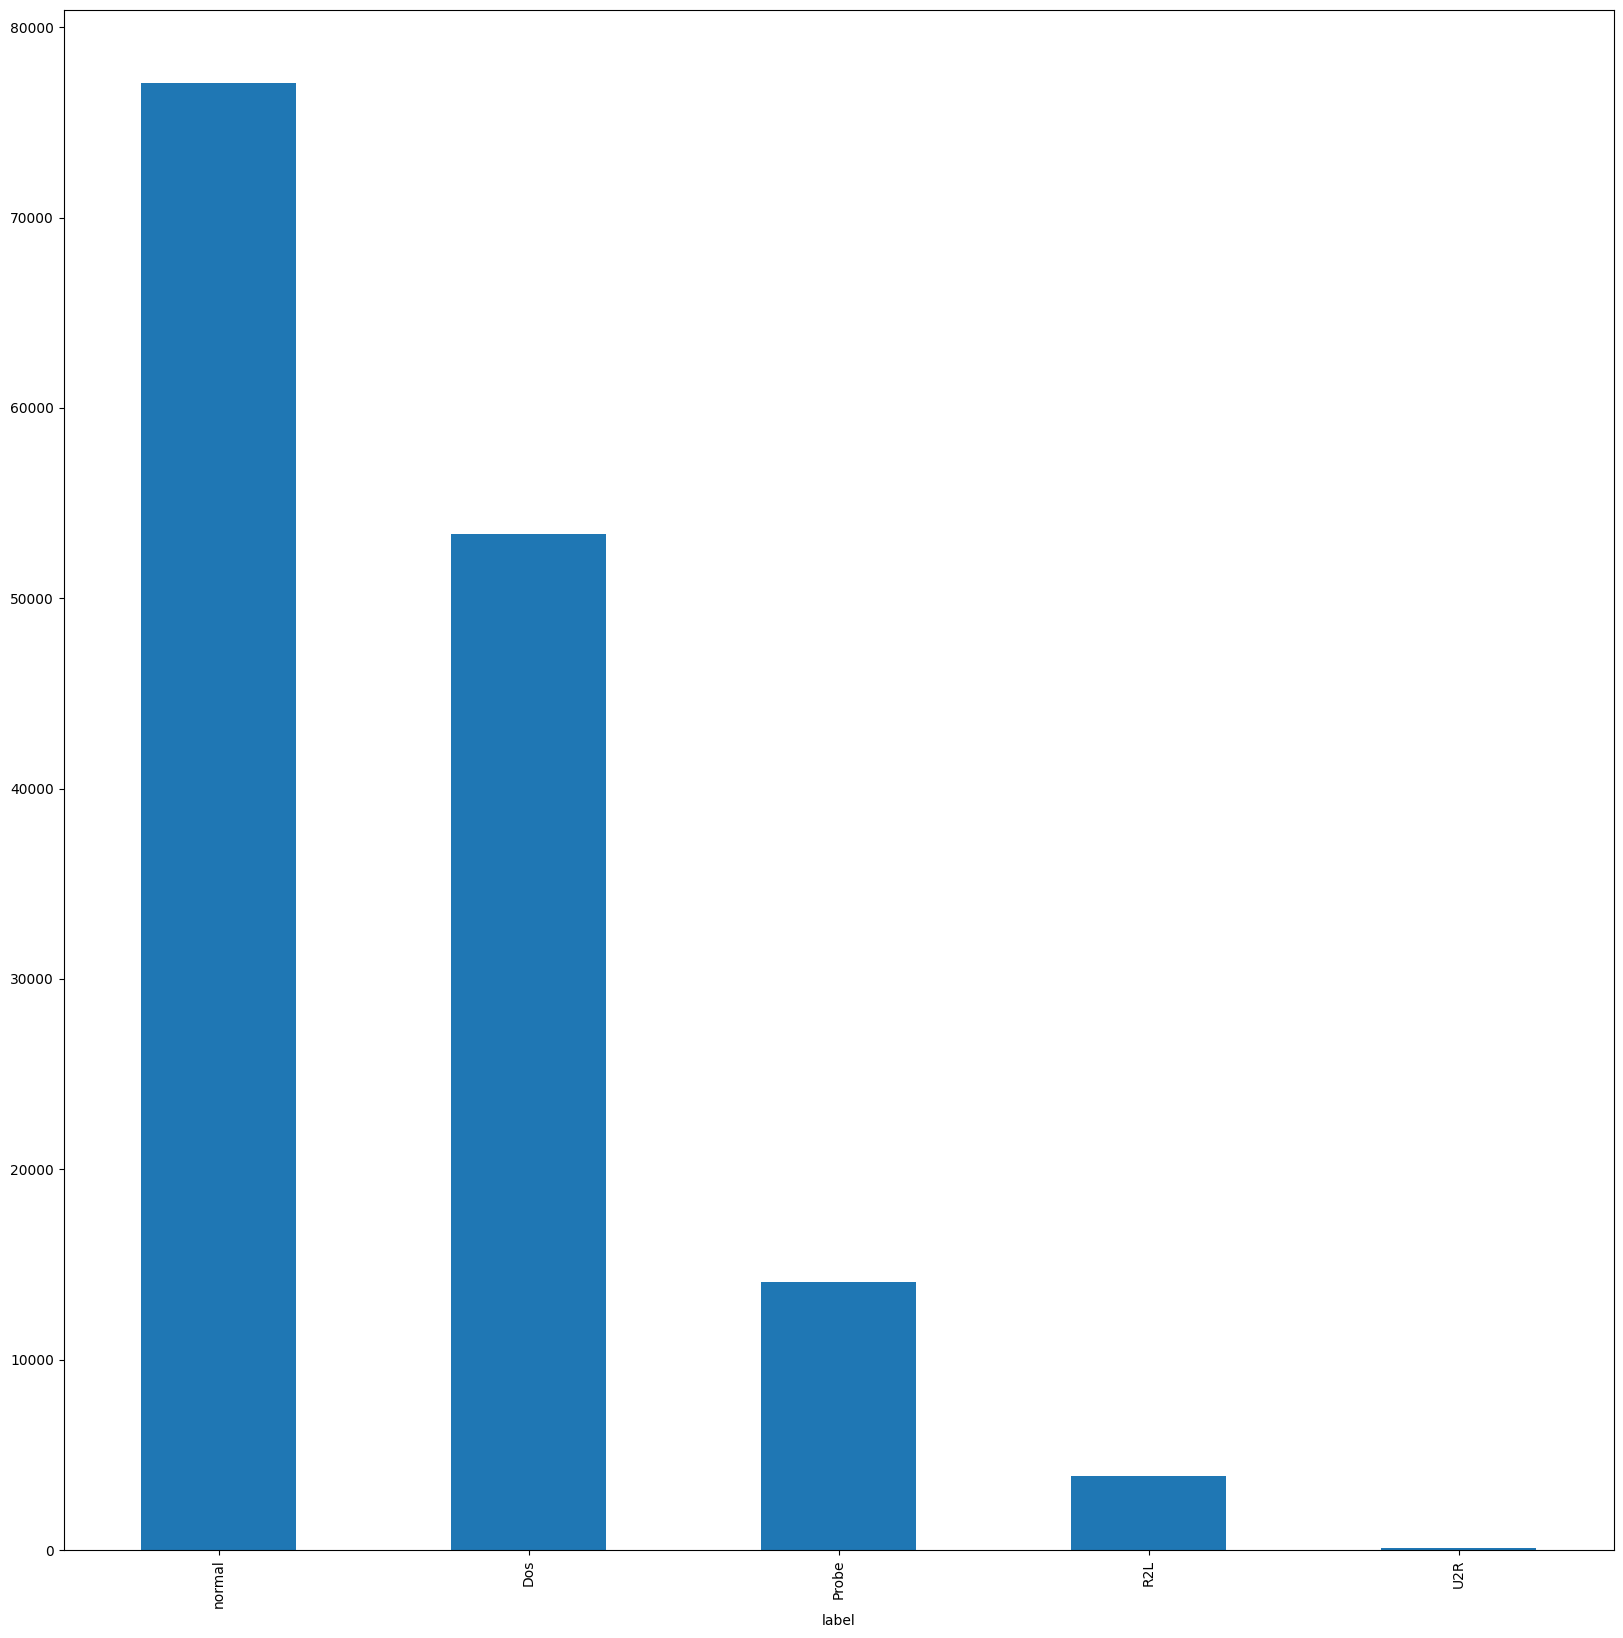

In [102]:
bar_graph('label')

In [103]:
# distribution of attack classes
train_data.label.value_counts()

,count
label,
normal,77054
Dos,53387
Probe,14077
R2L,3880
U2R,119


### Protocol


*   **Attribute No.** : 2

*   **Attribute Name.** : Protocol_type

*   **Description** : Protocol used in the connection





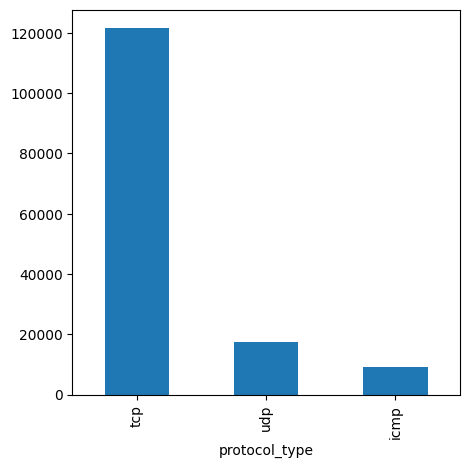

In [104]:
plt.rcParams['figure.figsize'] = (5, 5)
bar_graph('protocol_type')

### Services


*   **Attribute No.** : 3

*   **Attribute Name.** : Service

*   **Description** : Destination network service used





In [105]:
services_frequency = train_data['service'].value_counts()
subsetServices= list(services_frequency[:30].index)
services_frequency

,count
service,
http,48191
private,26627
domain_u,9937
smtp,8247
ftp_data,7711
...,...
tftp_u,4
http_8001,2
aol,2


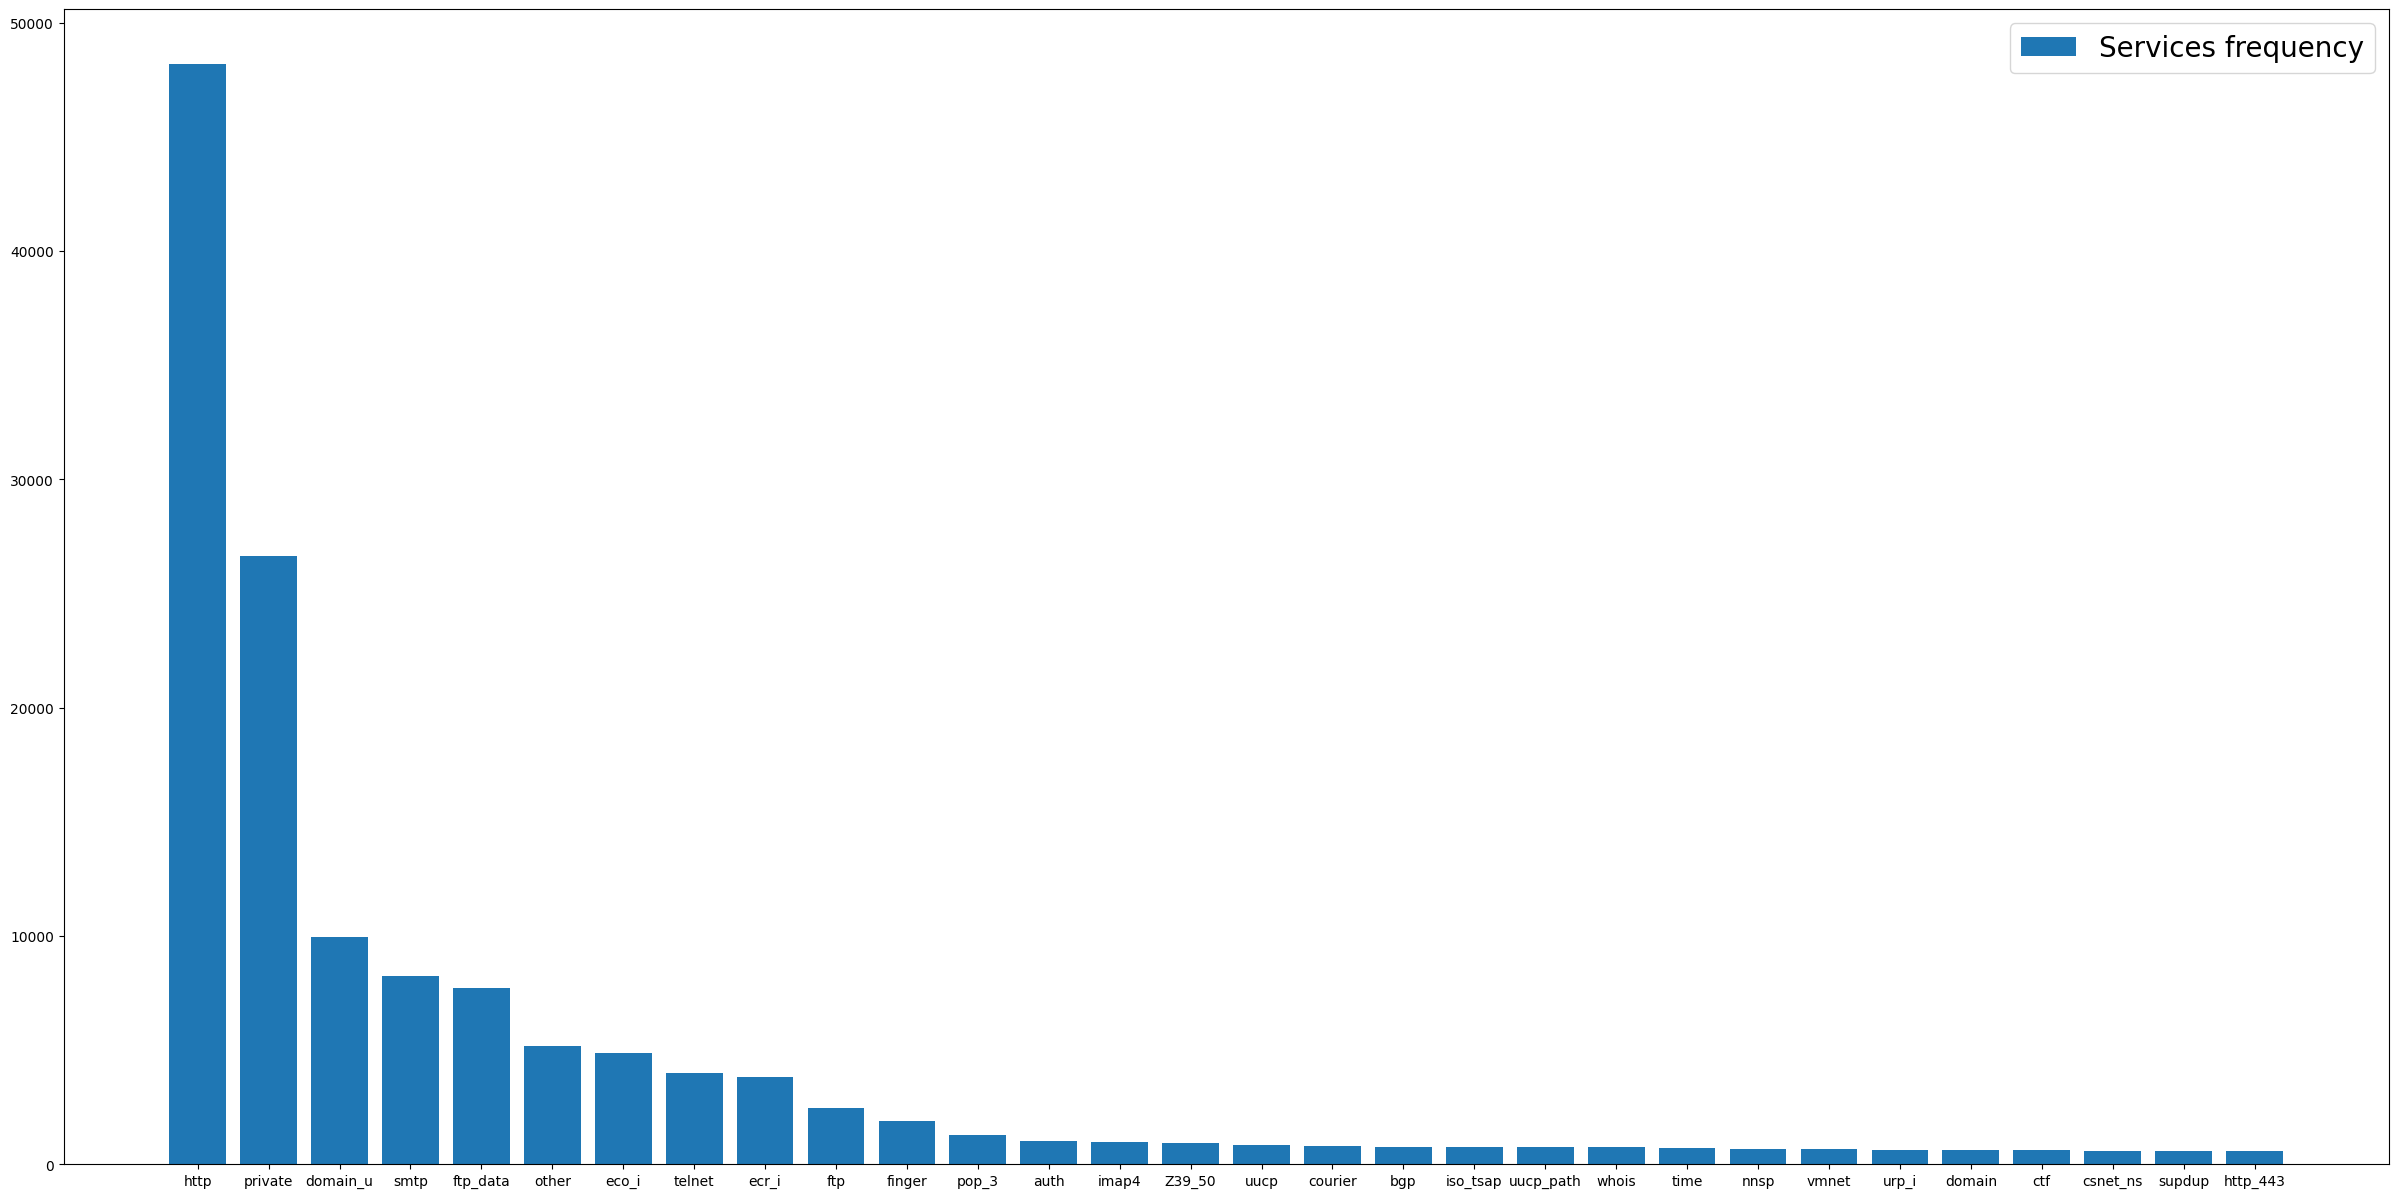

In [106]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,15)) # set the size that you'd like (width, height)
plt.bar(subsetServices, services_frequency[:30], label = 'Services frequency')
ax.legend(fontsize = 20)

### Duration

*   **Attribute No.** : 1

*   **Attribute Name.** : Duration

*   **Description** : Length of time duration of the connection


<ipython-input-107-1e2cde2fd433>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = df[feature])


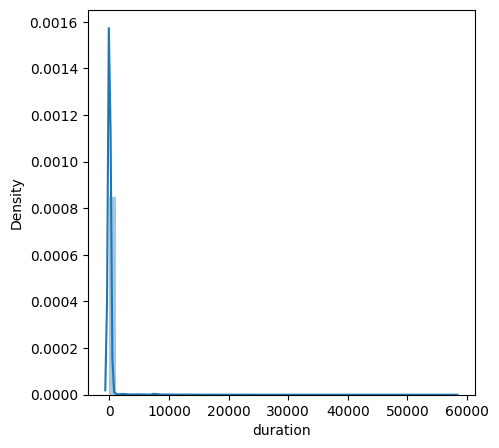

In [107]:
import seaborn as sns
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [108]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,2,"(0.0, 10000.0]"
3,0,"(-0.1, 0.0]"
4,1,"(0.0, 10000.0]"


In [109]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,2,"(0.0, 10000.0]","(0, 10000]"
3,0,"(-0.1, 0.0]",0
4,1,"(0.0, 10000.0]","(0, 10000]"
...,...,...,...
148512,0,"(-0.1, 0.0]",0
148513,8,"(0.0, 10000.0]","(0, 10000]"
148514,0,"(-0.1, 0.0]",0
148515,0,"(-0.1, 0.0]",0


In [110]:
duration_frequency = df['duration_bin'].value_counts()
#subsetServices= list(duration_frequency[:].index)
duration_frequency

,count
duration_bin,
0,134973
"(0, 10000]",12316
"(10000, 20000]",591
"(30000, 40000]",282
"(20000, 30000]",225


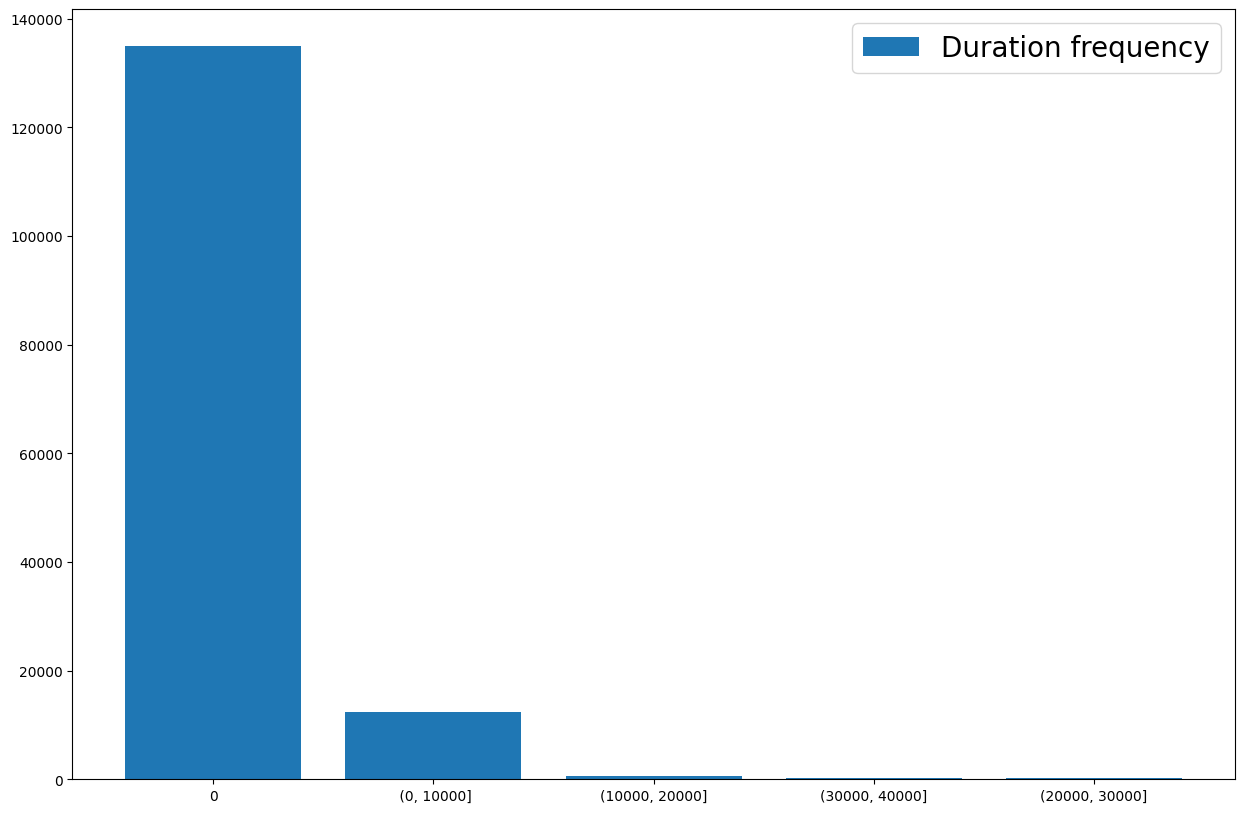

In [111]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

### Flag

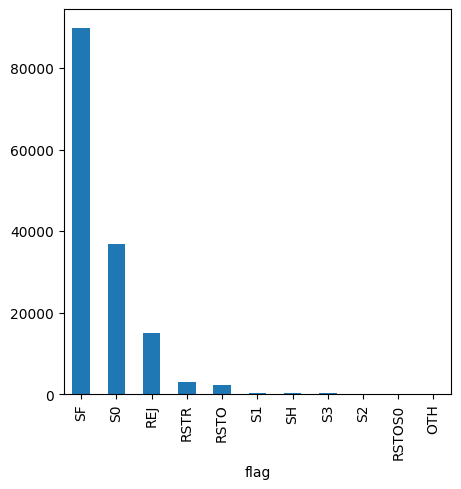

In [112]:
bar_graph('flag')

## **Bivariate Analysis**

### Protocol, Attack Types

In [113]:
df= pd.DataFrame(columns=['protocol', 'Attack_class', 'number of sample in Dataset'])

In [114]:
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))

In [115]:
for pro in protocols:
  for lab in Label:
    i = len(train_data.loc[(train_data['protocol_type']== pro) & (train_data['label']==lab)])
    if (i != 0):
      # Use pd.concat to append a new row as a DataFrame
      df = pd.concat([df, pd.DataFrame([{'protocol': pro, 'Attack_class': lab, 'number of sample in Dataset': i}])], ignore_index=True)

In [116]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

,protocol,Attack_class,number of sample in Dataset
0,tcp,Dos,48928
1,tcp,Probe,7721
5,icmp,Probe,4375
4,icmp,Dos,3553
2,tcp,R2L,3362
8,udp,Probe,1981
7,udp,Dos,906
9,udp,R2L,514
3,tcp,U2R,116
6,icmp,R2L,4


### Service, Attack Types

In [117]:
df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [118]:
services = list(services_frequency.index)
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))

In [119]:
df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])
services = list(services_frequency.index)  # Assuming services_frequency is defined elsewhere
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))

all_dfs = []  # List to store temporary DataFrames

for ser in services:
  for lab in Label:
    i = len(train_data.loc[(train_data['service']== ser) & (train_data['label']==lab)])
    if (i != 0):
      # Create a temporary DataFrame for the current row
      temp_df = pd.DataFrame([{'service': ser, 'Attack_class': lab, 'number of sample in Dataset': i}])
      all_dfs.append(temp_df)  # Append temporary DataFrame to the list

# Concatenate all temporary DataFrames into df_service
df_service = pd.concat(all_dfs, ignore_index=True)

In [120]:
df_service.sort_values(by=['number of sample in Dataset'], ascending=False)

,service,Attack_class,number of sample in Dataset
3,private,Dos,18877
4,private,Probe,5418
18,eco_i,Probe,4325
23,ecr_i,Dos,3545
0,http,Dos,3430
...,...,...,...
136,http_8001,Probe,2
137,aol,Probe,2
138,harvest,Probe,2
121,IRC,R2L,1


## **Multivariate Analysis**

### Protocol Type, Services, Label

In [121]:
df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [123]:
services = list(services_frequency.index)
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique()

df_list = []  # Create an empty list to store data

for ser in services:
  for pro in protocols:
    for lab in Label:
      i = len(train_data.loc[(train_data['service']== ser) & (train_data['protocol_type']== pro) & (train_data['label']==lab)])
      if (i != 0):
        # Append data as a dictionary to the list
        df_list.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i})

# Create the DataFrame outside the loop using pd.DataFrame
df = pd.DataFrame(df_list)

In [124]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

,protocol,service,label,number of sample in Dataset
1,tcp,http,normal,44722
4,tcp,private,Dos,17971
11,udp,domain_u,normal,9926
14,tcp,smtp,normal,7647
18,tcp,ftp_data,normal,5304
...,...,...,...,...
171,tcp,aol,Probe,2
152,tcp,remote_job,normal,1
147,tcp,IRC,R2L,1
107,tcp,link,normal,1


# **Data Prepration**


*   For Binary and Multi-class Classification
*   **Label encoding** with One-Hot






In [125]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,Dos
148513,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal
148514,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,normal
148515,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,Dos


In [126]:
for i in train_data.columns:
    print('\n',i)
    print(train_data[i].unique())


 duration
[    0     2     1 ...  5430 11680   679]

 protocol_type
['tcp' 'icmp' 'udp']

 service
['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u' 'red_i' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'harvest']

 flag
['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']

 src_bytes
[    0 12983    20 ...  2816 11466  2358]

 dst_bytes
[    0    15 14515 ...  5424 17655 52866]

 land
[0 1]

 wrong_fragment
[0 1 3]

 urgent
[0 1 2 3]

 hot
[  0   4   2   1   7   6   5   3  2

In [127]:
train_data.duration.unique()

array([    0,     2,     1, ...,  5430, 11680,   679])

In [128]:
train_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

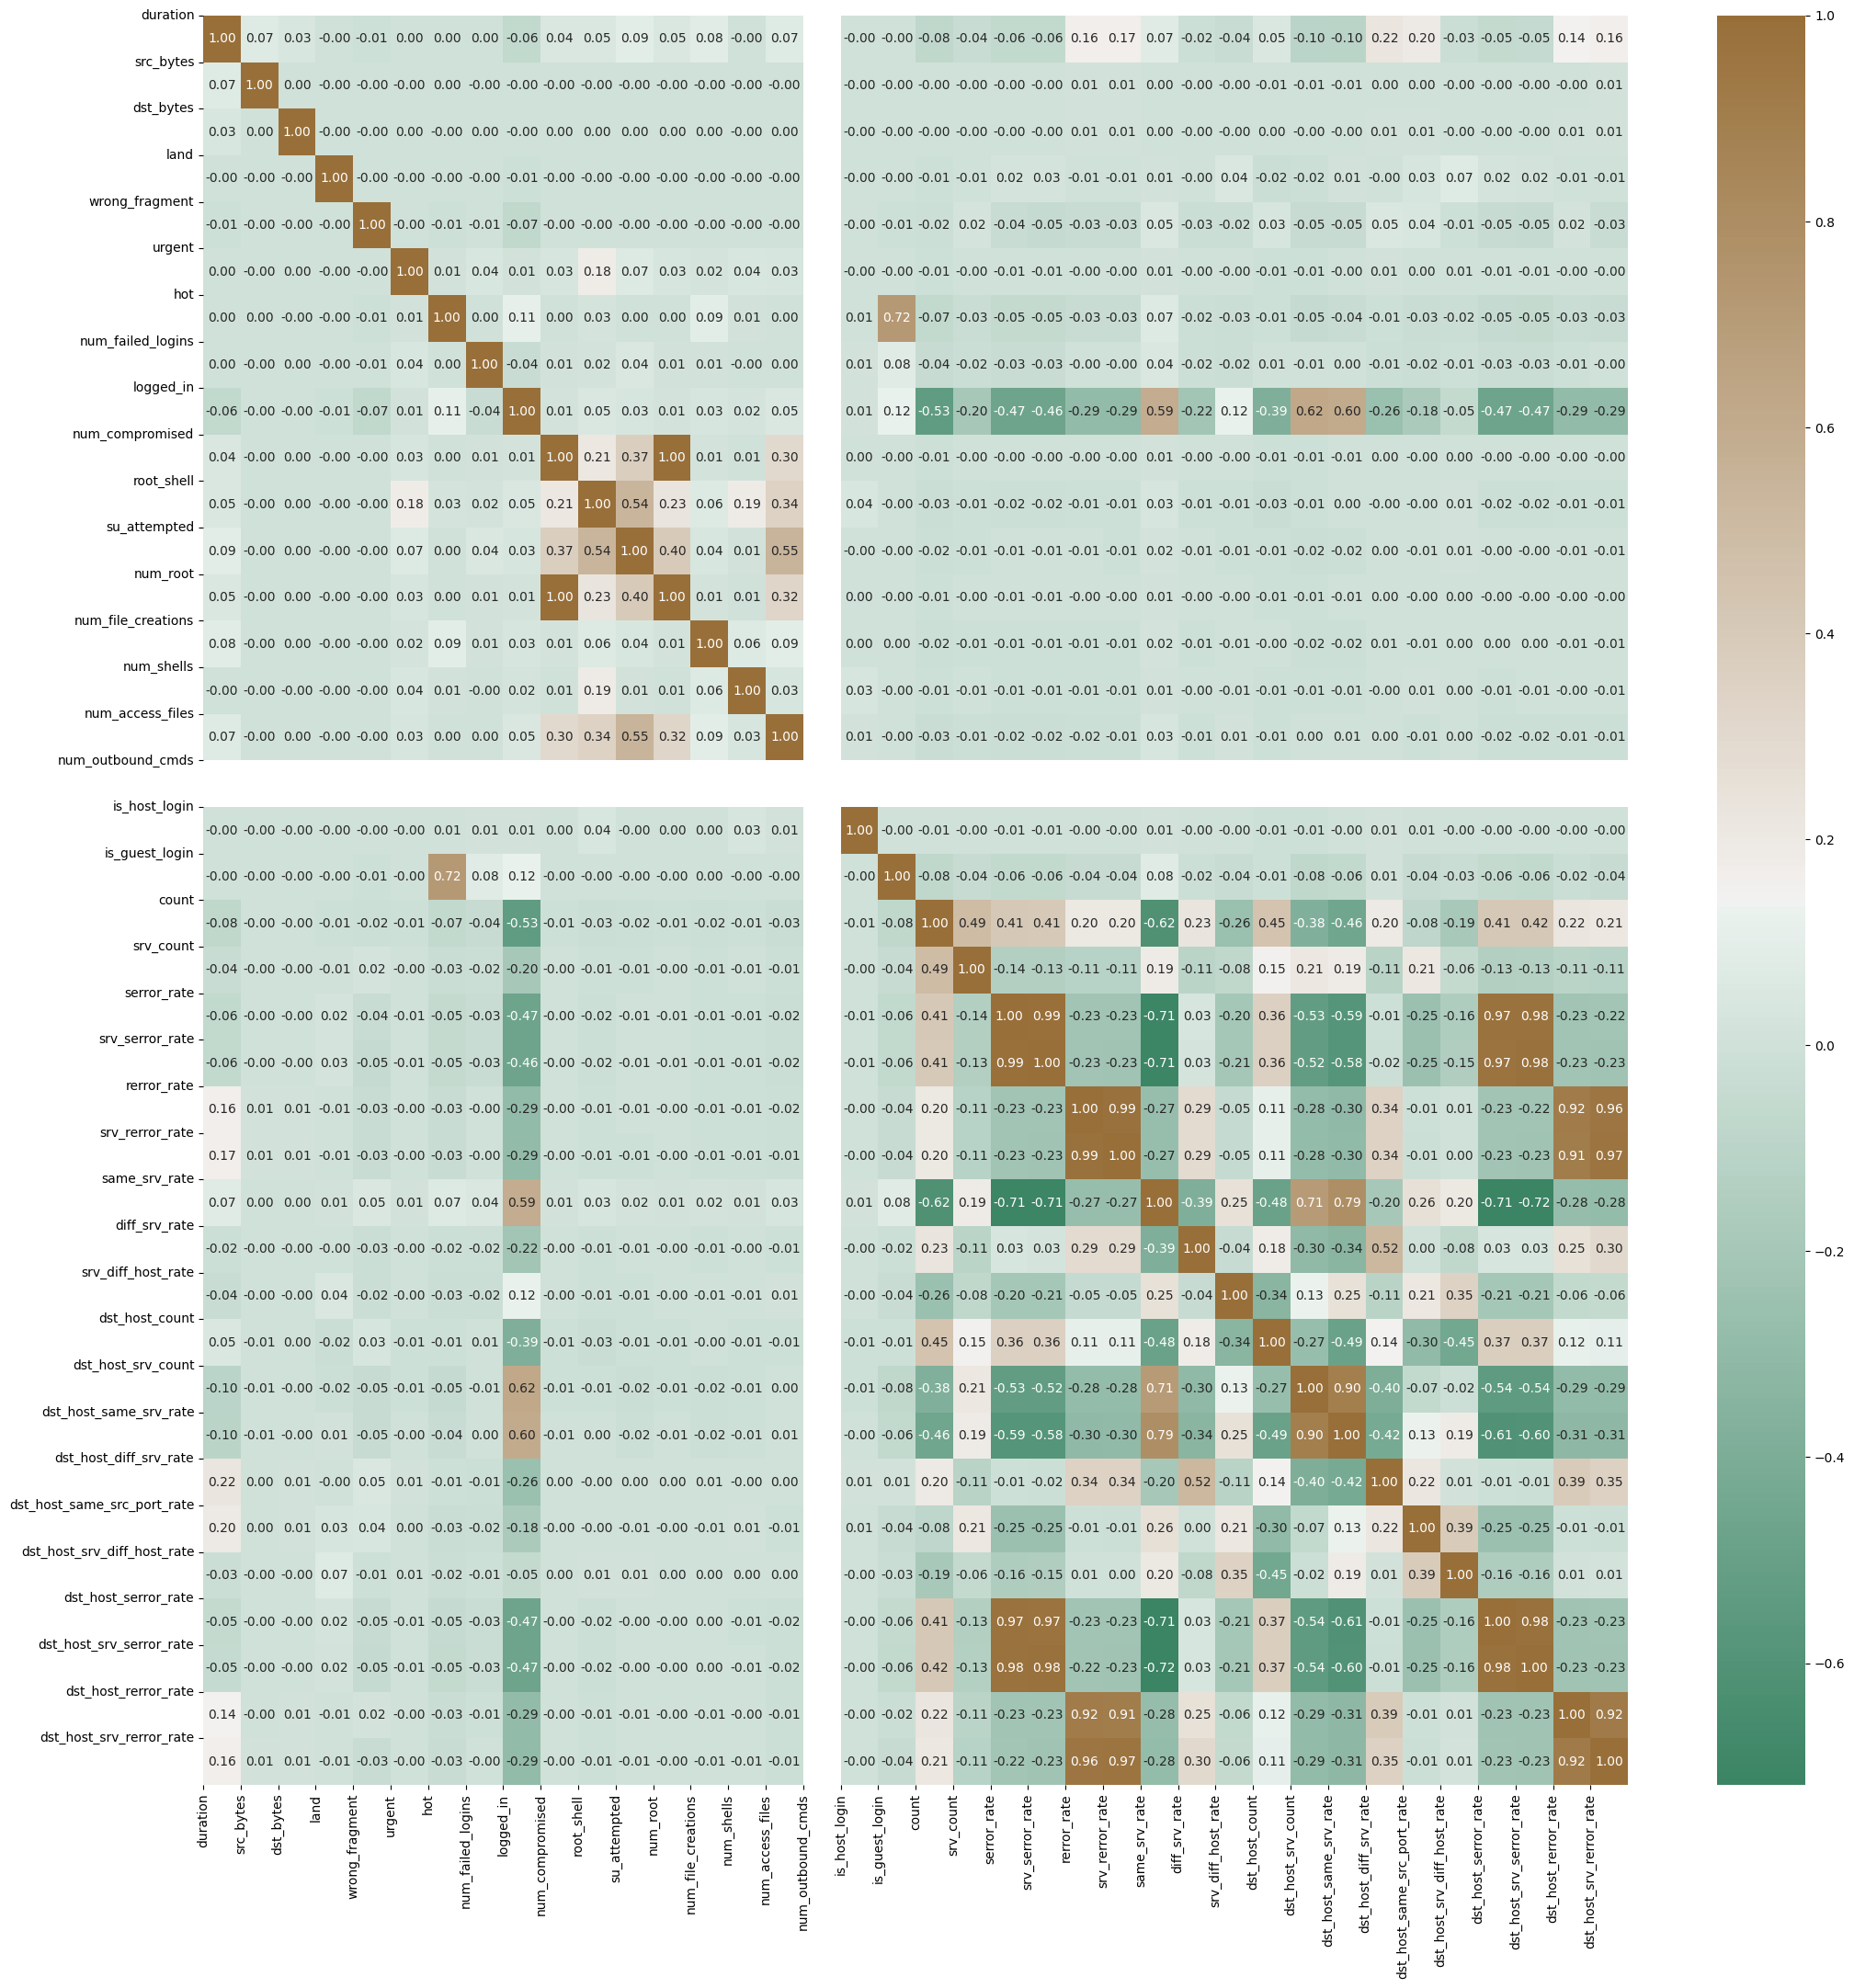

In [130]:
## Plotting Correlation of columns
# Select only numeric features for correlation calculation
numeric_data = train_data.select_dtypes(include=np.number)

corr = numeric_data.corr()
fig, ax = plt.subplots(figsize=(25, 25))
colormap = sns.diverging_palette(150,50, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [131]:
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,0.000525,-0.064474,0.043998,...,0.050311,-0.098013,-0.104631,0.223635,0.201276,-0.025950,-0.053810,-0.052306,0.143896,0.163306
src_bytes,0.068959,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,-0.000443,-0.003286,-0.000079,...,-0.005586,-0.006663,-0.006312,0.000730,0.000559,-0.001424,-0.004003,-0.002959,-0.001746,0.010494
dst_bytes,0.034056,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,0.000096,-0.002635,0.001253,...,0.002225,-0.003977,-0.004168,0.009834,0.010847,-0.001143,-0.002639,-0.002567,0.009986,0.009599
land,-0.001651,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,-0.000878,-0.012056,-0.000168,...,-0.024564,-0.015214,0.009425,-0.004612,0.032151,0.072119,0.020496,0.015019,-0.005983,-0.005972
wrong_fragment,-0.009616,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,-0.005115,-0.070207,-0.000981,...,0.032552,-0.046659,-0.046590,0.051988,0.040057,-0.009777,-0.045495,-0.049994,0.019283,-0.034778
urgent,0.002426,-0.000074,0.000179,-0.000153,-0.000889,1.000000,0.008151,0.037775,0.011253,0.029034,...,-0.011494,-0.009655,-0.003882,0.007248,0.002249,0.005386,-0.005676,-0.006068,-0.003789,-0.001098
hot,0.000664,0.000347,-0.000297,-0.001381,-0.008042,0.008151,1.000000,0.000297,0.113230,0.002582,...,-0.012182,-0.051125,-0.036210,-0.009751,-0.033311,-0.022945,-0.053126,-0.053734,-0.031549,-0.034212
num_failed_logins,0.000525,-0.000443,0.000096,-0.000878,-0.005115,0.037775,0.000297,1.000000,-0.039066,0.010565,...,0.005604,-0.006239,0.003340,-0.013585,-0.023664,-0.009839,-0.032305,-0.031961,-0.007965,-0.004594
logged_in,-0.064474,-0.003286,-0.002635,-0.012056,-0.070207,0.011253,0.113230,-0.039066,1.000000,0.013970,...,-0.385985,0.618150,0.598829,-0.256912,-0.177222,-0.054807,-0.465806,-0.468530,-0.290705,-0.294690
num_compromised,0.043998,-0.000079,0.001253,-0.000168,-0.000981,0.029034,0.002582,0.010565,0.013970,1.000000,...,-0.011188,-0.010329,-0.005224,0.002618,-0.001998,0.004064,-0.003901,-0.004390,-0.004044,-0.003572


In [132]:
len(train_data.columns)

42

In [133]:


# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
train_data.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
train_data.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train_data.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train_data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train_data.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train_data.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train_data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train_data.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [134]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.04,0.06,0.00,255,10,0.06,0.00,0.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.01,0.06,0.00,255,1,0.06,0.00,0.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.0,1.00,0.00,0.00,134,86,0.04,0.61,0.02,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.0,1.00,0.00,1.00,3,57,0.00,1.00,0.28,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,1.0,1.00,0.00,0.75,29,86,0.17,0.03,0.02,Probe


In [135]:
len(train_data.columns)

34

In [136]:

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train_data.drop('srv_diff_host_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train_data.drop('dst_host_count', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train_data.drop('dst_host_srv_count', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train_data.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train_data.drop('dst_host_same_src_port_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train_data.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)









In [137]:
for i in train_data.columns:
    print('\n',i)
    print(train_data[i].unique())


 duration
[    0     2     1 ...  5430 11680   679]

 protocol_type
['tcp' 'icmp' 'udp']

 service
['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u' 'red_i' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'harvest']

 flag
['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']

 src_bytes
[    0 12983    20 ...  2816 11466  2358]

 dst_bytes
[    0    15 14515 ...  5424 17655 52866]

 land
[0 1]

 wrong_fragment
[0 1 3]

 urgent
[0 1 2 3]

 hot
[  0   4   2   1   7   6   5   3  2

In [138]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()

In [139]:
def encoder(col,final_df):
    print('Processing',col)
    lable_encoder.fit(final_df[col])
    final_df[col]=lable_encoder.transform(final_df[col])

    le_name_mapping = dict(zip(lable_encoder.classes_, lable_encoder.transform(lable_encoder.classes_)))
    print(le_name_mapping)
    return final_df

In [140]:
train_data = encoder('protocol_type',train_data)

Processing protocol_type
{'icmp': 0, 'tcp': 1, 'udp': 2}


In [141]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,label
0,0,1,private,REJ,0,0,0,0,0,0,...,0,0,0,229,10,0.0,1.0,0.04,0.06,Dos
1,0,1,private,REJ,0,0,0,0,0,0,...,0,0,0,136,1,0.0,1.0,0.01,0.06,Dos
2,2,1,ftp_data,SF,12983,0,0,0,0,0,...,0,0,0,1,1,0.0,0.0,1.00,0.00,normal
3,0,0,eco_i,SF,20,0,0,0,0,0,...,0,0,0,1,65,0.0,0.0,1.00,0.00,Probe
4,1,1,telnet,RSTO,0,15,0,0,0,0,...,0,0,0,1,8,0.0,1.0,1.00,0.00,Probe


In [142]:
train_data = encoder('service',train_data)

Processing service
{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 'vmnet': 68, 'whois': 69}


In [143]:
for i, j in {'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}.items():
    print('<option value="'+str(j)+'">'+i.upper()+'</option>')

<option value="0">OTH</option>
<option value="1">REJ</option>
<option value="2">RSTO</option>
<option value="3">RSTOS0</option>
<option value="4">RSTR</option>
<option value="5">S0</option>
<option value="6">S1</option>
<option value="7">S2</option>
<option value="8">S3</option>
<option value="9">SF</option>
<option value="10">SH</option>


In [144]:
train_data = encoder('flag',train_data)

Processing flag
{'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}


In [145]:
train_data = encoder('label',train_data)

Processing label
{'Dos': 0, 'Probe': 1, 'R2L': 2, 'U2R': 3, 'normal': 4}


In [146]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,label
0,0,1,49,1,0,0,0,0,0,0,...,0,0,0,229,10,0.0,1.0,0.04,0.06,0
1,0,1,49,1,0,0,0,0,0,0,...,0,0,0,136,1,0.0,1.0,0.01,0.06,0
2,2,1,20,9,12983,0,0,0,0,0,...,0,0,0,1,1,0.0,0.0,1.00,0.00,4
3,0,0,14,9,20,0,0,0,0,0,...,0,0,0,1,65,0.0,0.0,1.00,0.00,1
4,1,1,60,2,0,15,0,0,0,0,...,0,0,0,1,8,0.0,1.0,1.00,0.00,1


In [147]:
y = train_data.label
x = train_data.drop(labels=['label'],axis=1)

In [148]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(103961, 27)
(103961,)
(44556, 27)
(44556,)


In [149]:
y

,label
0,0
1,0
2,4
3,1
4,1
...,...
148512,0
148513,4
148514,4
148515,0


In [150]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate
0,0,1,49,1,0,0,0,0,0,0,...,0,0,0,0,229,10,0.0,1.0,0.04,0.06
1,0,1,49,1,0,0,0,0,0,0,...,0,0,0,0,136,1,0.0,1.0,0.01,0.06
2,2,1,20,9,12983,0,0,0,0,0,...,0,0,0,0,1,1,0.0,0.0,1.00,0.00
3,0,0,14,9,20,0,0,0,0,0,...,0,0,0,0,1,65,0.0,0.0,1.00,0.00
4,1,1,60,2,0,15,0,0,0,0,...,0,0,0,0,1,8,0.0,1.0,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,49,5,0,0,0,0,0,0,...,0,0,0,0,184,25,1.0,0.0,0.14,0.06
148513,8,2,49,9,105,145,0,0,0,0,...,0,0,0,0,2,2,0.0,0.0,1.00,0.00
148514,0,1,54,9,2231,384,0,0,0,0,...,0,0,0,0,1,1,0.0,0.0,1.00,0.00
148515,0,1,30,5,0,0,0,0,0,0,...,0,0,0,0,144,8,1.0,0.0,0.06,0.05


In [151]:
pd.set_option('display.max_columns', None)


In [152]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [153]:
x.iloc(1)

# KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, accuracy_score

# Loop through k values from 1 to 4
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    # Predictions
    y_pred = knn.predict(x_val)  # Class labels
    y_pred_proba = knn.predict_proba(x_val)  # Probability estimates

    # Print results
    print('\n******')
    print("K: ", i)
    print("Log Loss: ", log_loss(y_val, y_pred_proba))  # Uses probability estimates
    print("Accuracy Score: ", accuracy_score(y_val, y_pred))  # Uses class labels
    print('******\n')


# Gaussian Naive Bayes

In [156]:

from sklearn.naive_bayes import GaussianNB

clfg = GaussianNB()
clfg.fit(x_train, y_train.values.ravel())
y_test_pred = clfg.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.4246341682377233


# Decision Tree

In [157]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
clfd.fit(x_train, y_train.values.ravel())
y_test_pred = clfd.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.9467636233055032


# Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
clfr.fit(x_train, y_train.values.ravel())
y_test_pred = clfr.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.9945910763982404


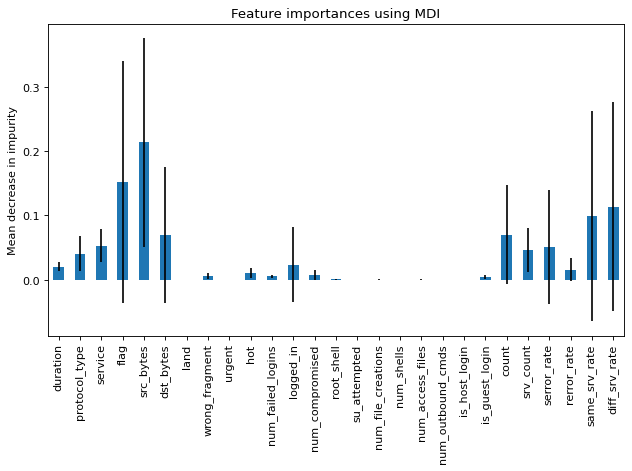

In [159]:
import time
import numpy as np
feature_names = x.columns


start_time = time.time()
importances = clfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in clfr.estimators_], axis=0)
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200)
clfl.fit(x_train, y_train.values.ravel())
y_test_pred = clfl.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


In [162]:
for i in x.columns:
    print("'\\n"+i+":',",i,end=',')

'\nduration:', duration,'\nprotocol_type:', protocol_type,'\nservice:', service,'\nflag:', flag,'\nsrc_bytes:', src_bytes,'\ndst_bytes:', dst_bytes,'\nland:', land,'\nwrong_fragment:', wrong_fragment,'\nurgent:', urgent,'\nhot:', hot,'\nnum_failed_logins:', num_failed_logins,'\nlogged_in:', logged_in,'\nnum_compromised:', num_compromised,'\nroot_shell:', root_shell,'\nsu_attempted:', su_attempted,'\nnum_file_creations:', num_file_creations,'\nnum_shells:', num_shells,'\nnum_access_files:', num_access_files,'\nnum_outbound_cmds:', num_outbound_cmds,'\nis_host_login:', is_host_login,'\nis_guest_login:', is_guest_login,'\ncount:', count,'\nsrv_count:', srv_count,'\nserror_rate:', serror_rate,'\nrerror_rate:', rerror_rate,'\nsame_srv_rate:', same_srv_rate,'\ndiff_srv_rate:', diff_srv_rate,

In [163]:
for i in x.columns:
    print(i,' = request.form["'+i+'"]')

duration  = request.form["duration"]
protocol_type  = request.form["protocol_type"]
service  = request.form["service"]
flag  = request.form["flag"]
src_bytes  = request.form["src_bytes"]
dst_bytes  = request.form["dst_bytes"]
land  = request.form["land"]
wrong_fragment  = request.form["wrong_fragment"]
urgent  = request.form["urgent"]
hot  = request.form["hot"]
num_failed_logins  = request.form["num_failed_logins"]
logged_in  = request.form["logged_in"]
num_compromised  = request.form["num_compromised"]
root_shell  = request.form["root_shell"]
su_attempted  = request.form["su_attempted"]
num_file_creations  = request.form["num_file_creations"]
num_shells  = request.form["num_shells"]
num_access_files  = request.form["num_access_files"]
num_outbound_cmds  = request.form["num_outbound_cmds"]
is_host_login  = request.form["is_host_login"]
is_guest_login  = request.form["is_guest_login"]
count  = request.form["count"]
srv_count  = request.form["srv_count"]
serror_rate  = request.form["serr

In [164]:
for i in x.columns:
    print('input_data.append(int('+i+'))')

input_data.append(int(duration))
input_data.append(int(protocol_type))
input_data.append(int(service))
input_data.append(int(flag))
input_data.append(int(src_bytes))
input_data.append(int(dst_bytes))
input_data.append(int(land))
input_data.append(int(wrong_fragment))
input_data.append(int(urgent))
input_data.append(int(hot))
input_data.append(int(num_failed_logins))
input_data.append(int(logged_in))
input_data.append(int(num_compromised))
input_data.append(int(root_shell))
input_data.append(int(su_attempted))
input_data.append(int(num_file_creations))
input_data.append(int(num_shells))
input_data.append(int(num_access_files))
input_data.append(int(num_outbound_cmds))
input_data.append(int(is_host_login))
input_data.append(int(is_guest_login))
input_data.append(int(count))
input_data.append(int(srv_count))
input_data.append(int(serror_rate))
input_data.append(int(rerror_rate))
input_data.append(int(same_srv_rate))
input_data.append(int(diff_srv_rate))


In [ ]:
len(x.columns)

In [165]:
## Saving Random Forest Model
import pickle
pickle.dump(clfr, open('rf_classifier.pkl', 'wb'))
pickle.dump(knn, open('knn_classifier.pkl', 'wb'))
pickle.dump(clfd, open('dt_classifier.pkl', 'wb'))


In [166]:
loaded_model = pickle.load(open('rf_classifier.pkl', 'rb'))


In [167]:
# {'Dos': 0, 'Probe': 1, 'R2L': 2, 'U2R': 3, 'normal': 4}
def decode(output):
    if output ==0:
        return 'Dos Attack'
    elif output ==1:
        return 'Probe Attack'
    elif output ==3:
        return 'R2L Attack'
    elif output ==4:
        return 'U2R Attack'
    elif output ==5:
        return 'Normal Attack'

In [168]:
x_train['duration'].unique()

array([    0,     3,  7633, ...,  7356,  7258, 26548])

In [ ]:
while True:
    print("\n************************************************************")
    input_data = []
    for col in x_train.columns:
        input_data.append(int(input("Select "+col+" "+str(x_train['duration'].unique())+": ")))

    print("\n**************** RESULT *********************\n\n\n\n")
    print('RF_result = ',decode(loaded_model.predict([input_data])[0]))


************************************************************


In [ ]:
x_train

In [ ]:
decode(loaded_model.predict([[2,2,1,20,9,12983,0,0,0,0,0,0.0,1.00,0.00,0.0,134,86,0.04,0.61,0.02]])[0])
